Compare model results for stepwise increase in CO2 emissions using:
1. FaIR -- uses analytical two-box (slow and fast) model to estimate temperature change (fair.forward)
2. FaIR modified with numerical two-layer-model (fair.forward2) according to Held et al. 2010
3. FaIR with same two-layer-model adjusted with efficacy factor according to Geoffrey et al. 2013 part 2 (fair.foward3)


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pandas as pd


import fair
from matplotlib import pyplot as plt
from fair.forward import fair_scm # original
from fair.forward2 import fair_scm # two-layer model
from fair.forward3 import fair_scm # two-layer model + toa imbalance(N)
from fair.forward4 import fair_scm # original + toa imbalance(N)
from fair.forward5 import fair_scm # original + calculate tau


initial temperature anomaly for foward.2 equals: 0.0
initial temperature anomaly equals: 0.0


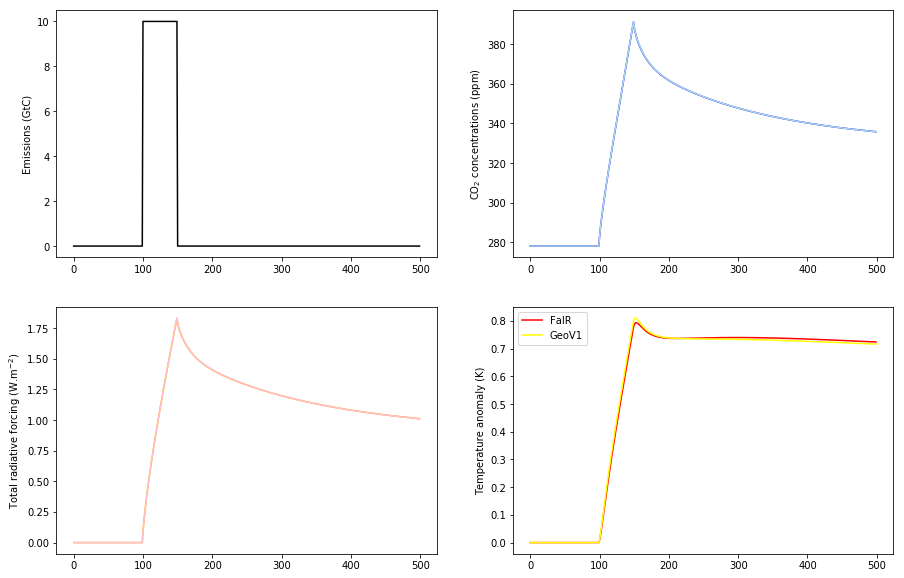

In [2]:
emissions = np.zeros(500)
emissions[:100] = 0
emissions[100:150] = 10 # 10 g emissions/yr for 50 years --> CO2 conc. approximately 400 ppm
emissions[150:] = 0
other_rf = np.zeros(emissions.size)
# for x in range(0, emissions.size):
    # other_rf[x] = 0.5 * np.sin(2 * np.pi * (x) / 14.0)
    
C2,F2,T2 = fair.forward2.fair_scm(
    emissions=emissions,
    other_rf=other_rf,
    useMultigas=False
)

C1,F1,T1 = fair.forward.fair_scm(
    emissions=emissions,
    other_rf=other_rf,
    useMultigas=False
)


fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
ax1.plot(range(0, emissions.size), emissions, color='black')
ax1.set_ylabel('Emissions (GtC)')
ax2 = fig.add_subplot(222)
ax2.plot(range(0, emissions.size), C1, color='blue')
ax2.plot(range(0, emissions.size), C2, color='lightblue')
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3 = fig.add_subplot(223)
ax3.plot(range(0, emissions.size), F1, color='orange')
ax3.plot(range(0, emissions.size), F2, color='pink')
ax3.set_ylabel('Total radiative forcing (W.m$^{-2}$)')
ax4 = fig.add_subplot(224)
ax4.plot(range(0, emissions.size), T1, color='red', label = 'FaIR')
ax4.plot(range(0, emissions.size), T2, color='yellow', label = 'GeoV1')
ax4.set_ylabel('Temperature anomaly (K)')
ax4.legend()

Plot net top-of-atmosphere radiative imbalance as a function of 1 ) time and 2) temperature anomaly across models

In [12]:
C = np.ones(500)*560
# C[0:200] = 560 # CO2 doubling in year 200
# C[200:500] = 280

C3,F3,T3,N3 = fair.forward3.fair_scm(emissions_driven=False, 
                                     C=C, 
                                     eps=1.0,
                                     gam=0.963,
                                     other_rf=other_rf, 
                                     useMultigas=False)

C4,F4,T4,N4 = fair.forward3.fair_scm(emissions_driven=False, 
                                     eps=1.28, 
                                     gam=0.67, 
                                     C=C, 
                                     other_rf=other_rf, 
                                     useMultigas=False)

C5,F5,T5,N5 = fair.forward4.fair_scm(emissions_driven=False, 
                                   C=C, 
                                   other_rf=other_rf, 
                                   useMultigas=False)

initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0


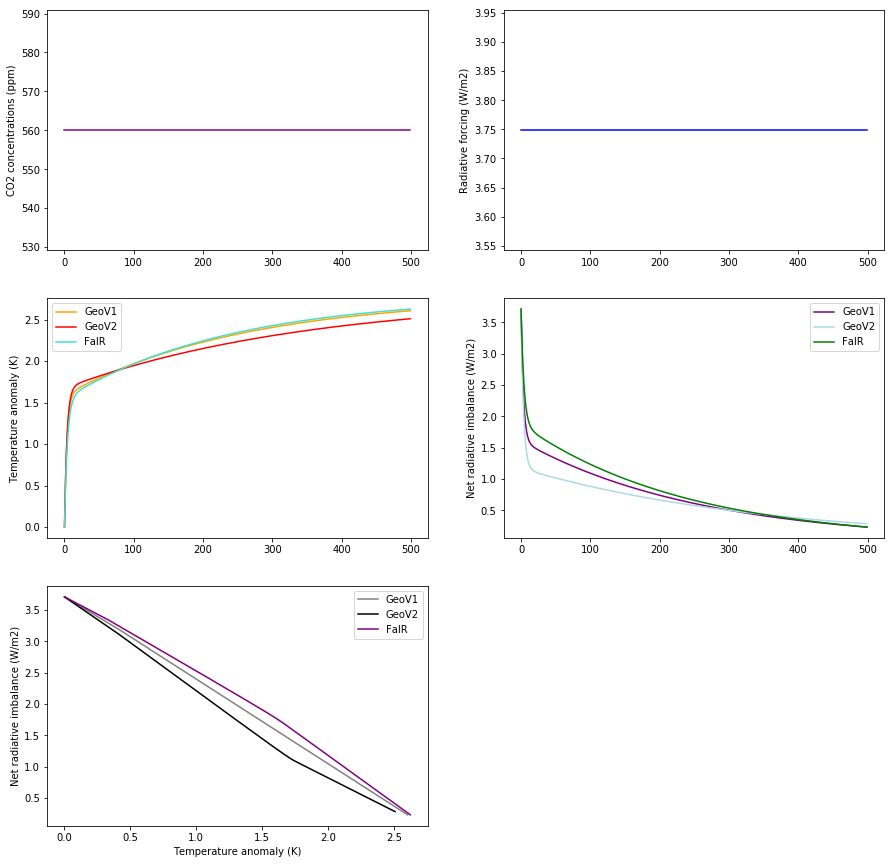

In [13]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax1.plot(range(0, C.size), C3, color='purple')
ax1.set_ylabel('CO2 concentrations (ppm)')
ax2 = fig.add_subplot(322)
ax2.plot(range(0, C.size), F3, color='blue')
ax2.set_ylabel('Radiative forcing (W/m2)')
ax3 = fig.add_subplot(323)
ax3.plot(range(0, C.size), T3, color='orange', label='GeoV1')
ax3.plot(range(0, C.size), T4, color='red', label='GeoV2')
ax3.plot(range(0, C.size), T5, color='turquoise', label='FaIR')
ax3.set_ylabel('Temperature anomaly (K)')
ax3.legend()
ax4 = fig.add_subplot(324)
ax4.plot(range(0, C.size), N3, color='purple', label='GeoV1')
ax4.plot(range(0, C.size), N4, color='lightblue', label='GeoV2')
ax4.plot(range(0, C.size), N5, color='green', label='FaIR')
ax4.set_ylabel('Net radiative imbalance (W/m2)')
ax4.legend()
ax5 = fig.add_subplot(325)
ax5.plot(T3, N3, color='gray', label='GeoV1')
ax5.plot(T4, N4, color='black', label='GeoV2')
ax5.plot(T5, N5, color='purple', label='FaIR')
ax5.set_xlabel('Temperature anomaly (K)')
ax5.set_ylabel('Net radiative imbalance (W/m2)')
ax5.legend()


In [14]:
from scipy import stats
from fair.tools.ensemble import tcrecs_generate

tcrecs = tcrecs_generate(n=10, seed=38571)
tcrecs

print(tcrecs)

[[1.54187499 2.50136015]
 [2.02172592 3.13136716]
 [1.91643155 3.33250632]
 [1.98209737 4.42249129]
 [1.67568667 2.70111011]
 [2.61361689 3.43706558]
 [1.49522084 2.78647639]
 [2.2750952  4.17462896]
 [1.87888883 2.95165319]
 [1.58219641 2.33962599]]


In [18]:

print(str(tcrecs[0,:]) + str(' dark blue'))
print(str(tcrecs[1,:]) + str(' orange'))
print(str(tcrecs[2,:]) + str(' green'))
print(str(tcrecs[3,:]) + str(' red'))
print(str(tcrecs[4,:]) + str(' purple'))
print(str(tcrecs[5,:]) + str(' brown'))
print(str(tcrecs[6,:]) + str(' pink'))
print(str(tcrecs[7,:]) + str(' gray'))
print(str(tcrecs[8,:]) + str(' yellow'))
print(str(tcrecs[9,:]) + str(' cyan'))

[1.54187499 2.50136015] dark blue
[2.02172592 3.13136716] orange
[1.91643155 3.33250632] green
[1.98209737 4.42249129] red
[1.67568667 2.70111011] purple
[2.61361689 3.43706558] brown
[1.49522084 2.78647639] pink
[2.2750952  4.17462896] gray
[1.87888883 2.95165319] yellow
[1.58219641 2.33962599] cyan


In [19]:
lam = 3.71/tcrecs[:,1]
gam = 3.71/tcrecs[:,0]-lam

# print(lam)
# print(gam)

C = np.ones(500)*560

other_rf = np.zeros(C.size)

In [20]:
T = np.zeros((500,10))
T2 = np.zeros((500,10))
T3 = np.zeros((500,10))
N = np.zeros((500,10))
N2 = np.zeros((500,10))

for i in range(10):
    _, _, Ta, Na = fair.forward3.fair_scm(emissions_driven=False, 
                                      C=C,
                                      eps=1.28,
                                      other_rf=other_rf, 
                                      tcrecs=tcrecs[i,:],
                                      lam = lam[i],
                                      gam = gam[i],
                                      useMultigas=False)

    
    _, _, T2a, N2a = fair.forward4.fair_scm(emissions_driven=False, 
                                       C=C, 
                                       other_rf=other_rf, 
                                       tcrecs = tcrecs[i,:], 
                                       useMultigas=False)
    T[:,i] = Ta
    T2[:,i] = T2a
    N[:,i] = Na
    N2[:,i] = N2a

initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0


Text(0.5, 0, 'Temperature anomaly (K)')

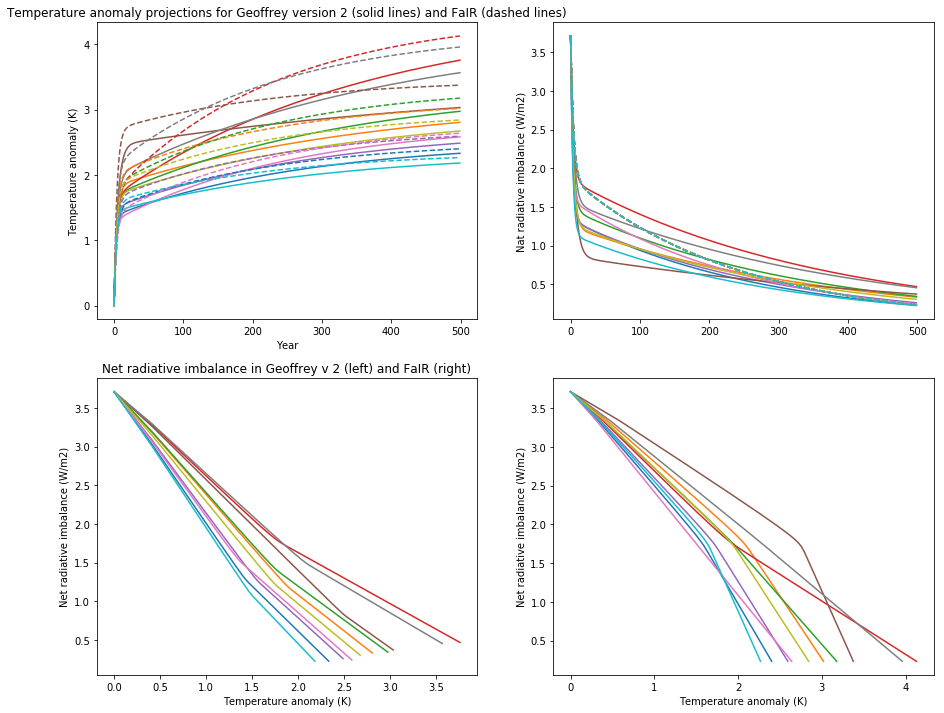

In [22]:
fig = plt.figure(figsize = (15, 12))
ax1 = fig.add_subplot(221)
ax1.plot(range(0,500), T)
ax1.plot(range(0,500), T2, linestyle = 'dashed')
ax1.set_ylabel('Temperature anomaly (K)')
ax1.set_xlabel('Year')
plt.title('Temperature anomaly projections for Geoffrey version 2 (solid lines) and FaIR (dashed lines)')
ax2 = fig.add_subplot(222)
ax2.plot(range(0,500), N)
ax2.plot(range(0,500), N2, linestyle = 'dashed')
ax2.set_ylabel('Nat radiative imbalance (W/m2)')
ax3 = fig.add_subplot(223)
ax3.plot(T, N)
ax3.set_ylabel('Net radiative imbalance (W/m2)')
ax3.set_xlabel('Temperature anomaly (K)')
plt.title('Net radiative imbalance in Geoffrey v 2 (left) and FaIR (right)')
ax4 = fig.add_subplot(224)
ax4.plot(T2, N2)
ax4.set_ylabel('Net radiative imbalance (W/m2)')
ax4.set_xlabel('Temperature anomaly (K)')